# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Prever a renda de uma pessoa com base nos dados por ela fornecidos pode ser valioso em diversos ambientes, bancos para prever se um cliente tem risco de inadimplência ou não, e por assim saber qual o crédito e taxas que devem ser definidas para determinada pessoa com essas informações


## Etapa 2 Crisp-DM: Entendimento dos dados



### Dicionário de dados




| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data                                               | objeto       |
| id_cliente              |  id de cadastro do cliente                          | int          |
| sexo                    |  M ou F                                             | objeto       |
| posse_de_veiculo        |  se possui veiculo ou não                           | bool         |
| posse_de_imovel         |  se possui imóvel ou não                            | bool         |
| qtd_filhos              |  Quantidade de filhos                               | int          |
| tipo_renda              |  tipo da renda                                      | objeto       |
| educacao                |  escolaridade                                       | objeto       |
| estado_civil            |  estado civil                                       | objeto       |
| tipo_residencia         |  tipo de residencia                                 | objeto       |
| idade                   |  idade                                              | int          |
| tempo_emprego           |  tempo de emprego                                   | float        |
| qt_pessoas_residencia   |  número de pessoas na residência                    | float        |
| renda                   |  renda (variável de interesse)                      | float        |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [152]:
import numpy as np

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [102]:
from sklearn.model_selection import train_test_split

In [109]:
import statsmodels.formula.api as smf

In [110]:
import statsmodels.api as sm
import patsy

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.head(10)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
5,5,2015-01-01,10581,F,False,True,0,Assalariado,Superior completo,Casado,Casa,39,4.345205,2.0,1445.87
6,6,2015-01-01,7129,F,False,True,0,Empresário,Superior completo,Viúvo,Casa,55,6.378082,1.0,1726.03
7,7,2015-01-01,9952,F,False,True,0,Empresário,Secundário,Casado,Casa,36,3.104110,2.0,2515.98
8,8,2015-01-01,883,F,False,True,0,Assalariado,Secundário,Casado,Casa,50,18.605479,2.0,3420.34
9,9,2015-01-01,8070,M,True,True,0,Assalariado,Superior completo,Casado,Casa,60,10.558904,2.0,12939.14


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [4]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

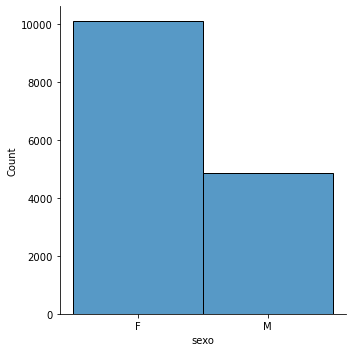

In [6]:
sns.displot(data=renda, x='sexo')

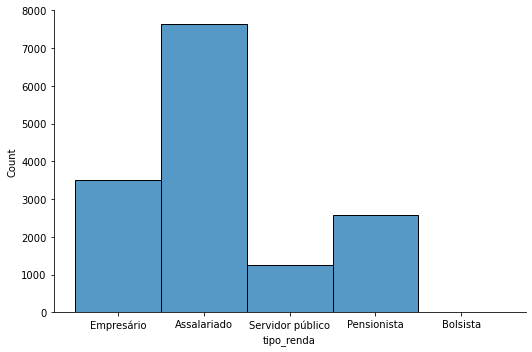

In [7]:
sns.displot(data=renda, x='tipo_renda', aspect = 1.5)

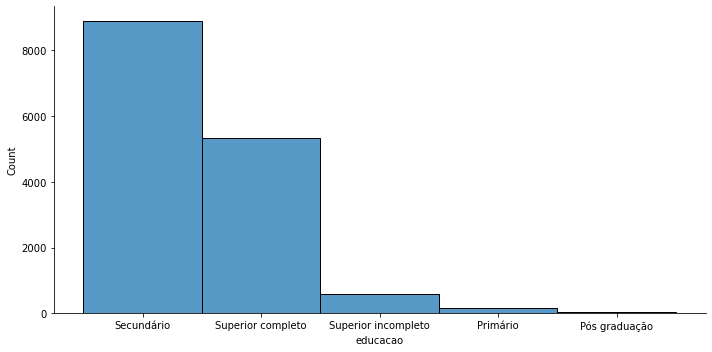

In [8]:
sns.displot(data=renda, x='educacao',aspect=2)

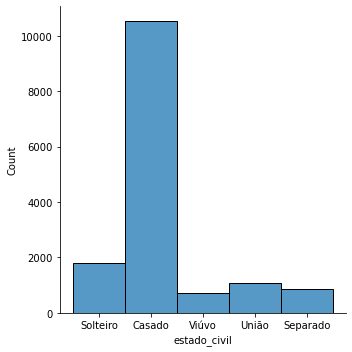

In [9]:
sns.displot(data=renda, x='estado_civil')

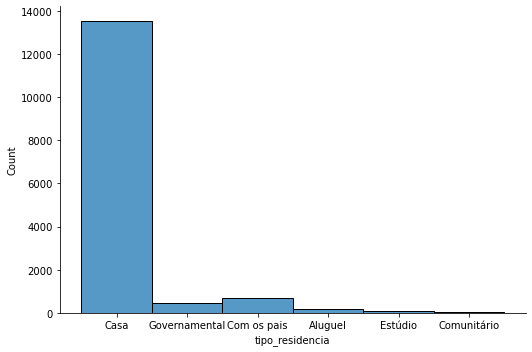

In [10]:
sns.displot(data=renda, x='tipo_residencia',aspect=1.5)

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='count'>

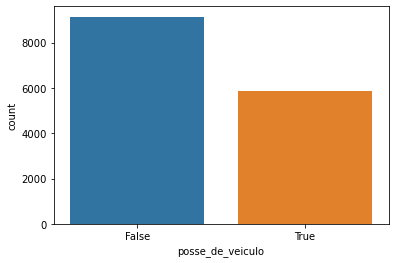

In [11]:
sns.countplot(data=renda, x='posse_de_veiculo')

<AxesSubplot:xlabel='posse_de_imovel', ylabel='count'>

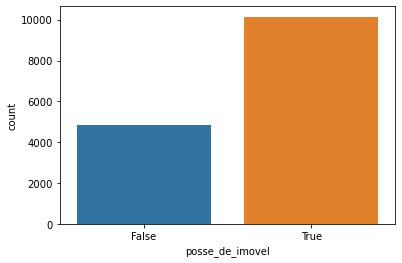

In [12]:
sns.countplot(data=renda, x='posse_de_imovel', )

<AxesSubplot:xlabel='qtd_filhos', ylabel='count'>

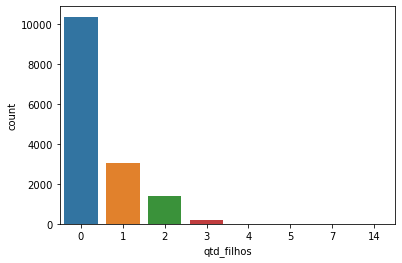

In [13]:
sns.countplot(data=renda, x='qtd_filhos')

<AxesSubplot:xlabel='qt_pessoas_residencia', ylabel='count'>

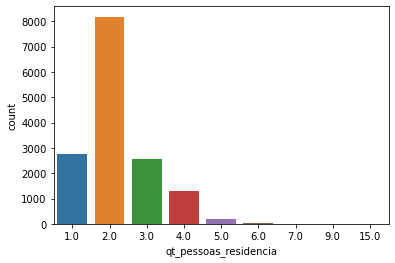

In [14]:
sns.countplot(data=renda, x='qt_pessoas_residencia')

### Entendimento dos dados - Bivariadas




In [15]:
renda.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [16]:
renda[['posse_de_imovel','posse_de_veiculo','renda','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia']].corr()

,posse_de_imovel,posse_de_veiculo,renda,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
posse_de_imovel,1.000000,-0.014172,0.003880,-0.022738,0.140510,0.009465,-0.023415
posse_de_veiculo,-0.014172,1.000000,0.100493,0.118690,-0.178903,-0.076155,0.167240
renda,0.003880,0.100493,1.000000,0.029346,0.022435,0.385013,0.047842
qtd_filhos,-0.022738,0.118690,0.029346,1.000000,-0.360426,-0.063220,0.889777
idade,0.140510,-0.178903,0.022435,-0.360426,1.000000,0.321573,-0.339320
tempo_emprego,0.009465,-0.076155,0.385013,-0.063220,0.321573,1.000000,-0.065670
qt_pessoas_residencia,-0.023415,0.167240,0.047842,0.889777,-0.339320,-0.065670,1.000000


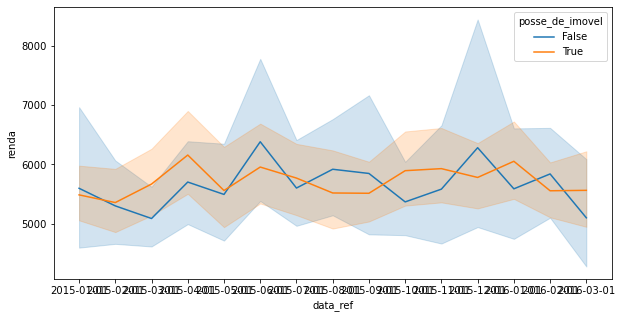

In [63]:
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='data_ref',y='renda', hue='posse_de_imovel',data=renda)
plt.show()

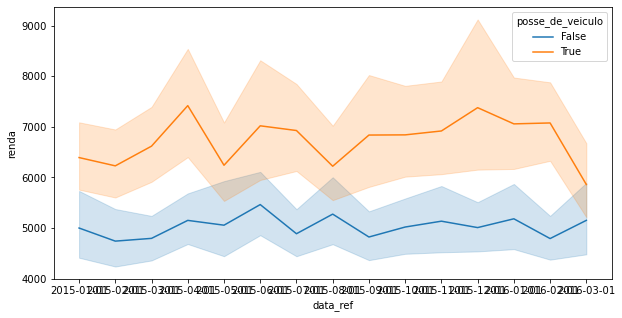

In [62]:
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='data_ref',y='renda', hue='posse_de_veiculo',data=renda,ax=ax)
plt.show()

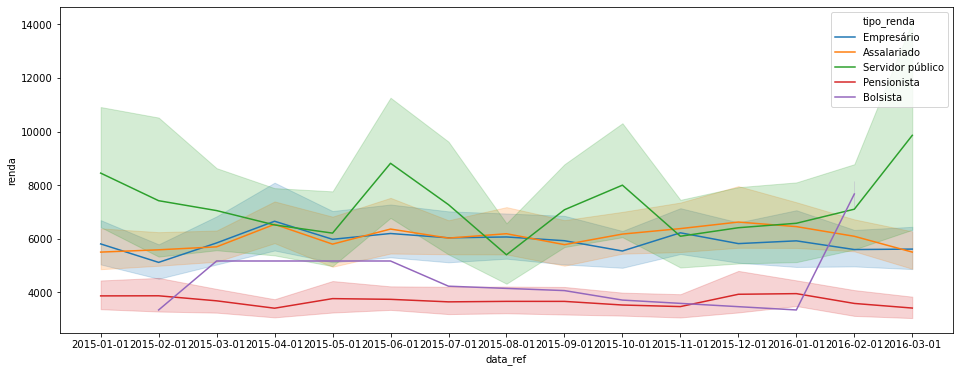

In [58]:
fig,ax = plt.subplots(figsize=(16,6))
sns.lineplot(x='data_ref',y='renda', hue='tipo_renda',data=renda,ax=ax )
plt.show()

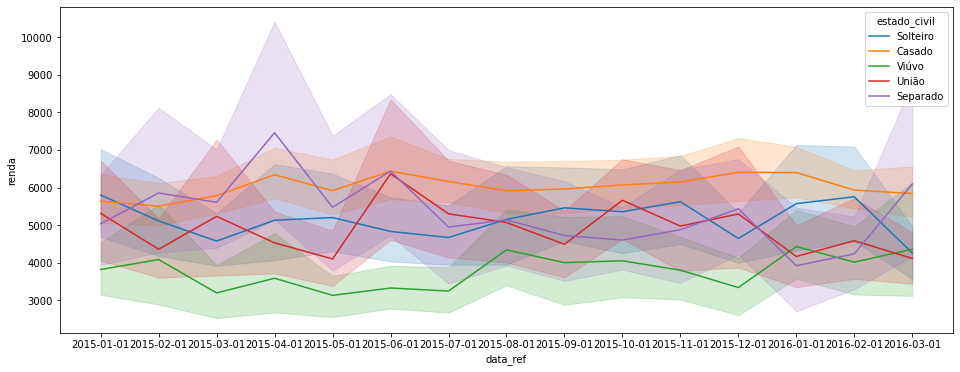

In [64]:
fig,ax = plt.subplots(figsize=(16,6))
sns.lineplot(x='data_ref',y='renda', hue='estado_civil',data=renda,ax=ax)
plt.show()

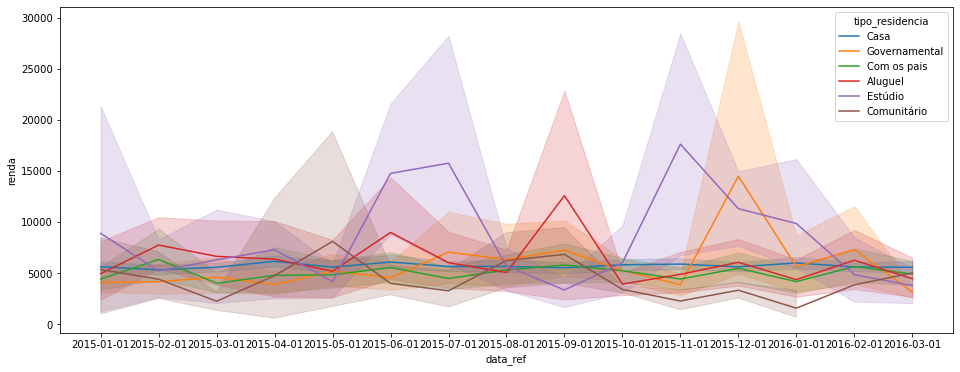

In [65]:
fig,ax = plt.subplots(figsize=(16,6))
sns.lineplot(x='data_ref',y='renda', hue='tipo_residencia',data=renda, ax=ax)
plt.show()

<AxesSubplot:xlabel='qtd_filhos', ylabel='renda'>

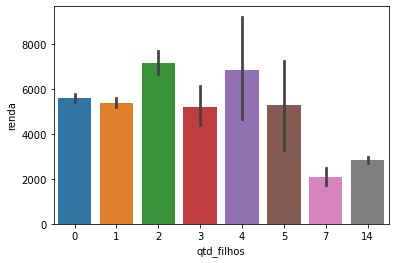

In [69]:
sns.barplot(x='qtd_filhos',y='renda',data=renda)

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='renda'>

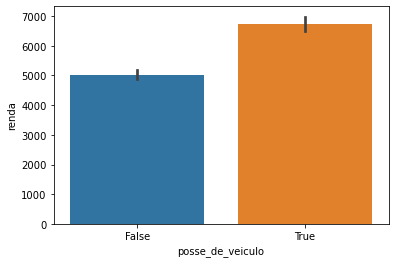

In [71]:
sns.barplot(x='posse_de_veiculo',y='renda',data=renda)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='renda'>

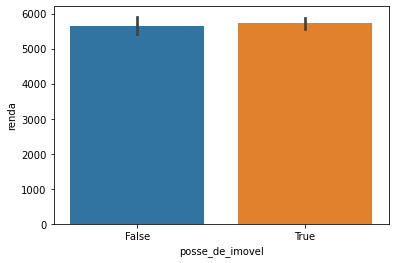

In [72]:
sns.barplot(x='posse_de_imovel',y='renda',data=renda)

<AxesSubplot:xlabel='educacao', ylabel='renda'>

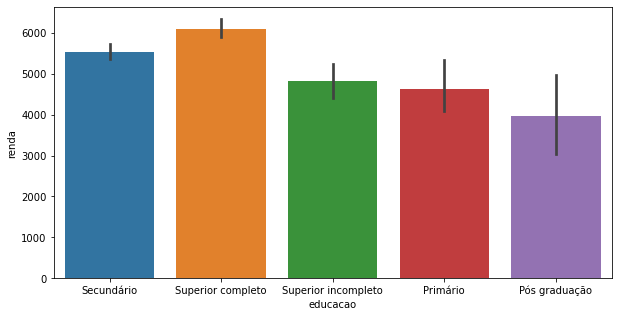

In [75]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='educacao',y='renda',data=renda,ax=ax)

<AxesSubplot:xlabel='tempo_emprego', ylabel='idade'>

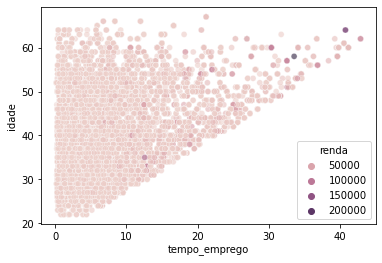

In [99]:
sns.scatterplot(x='tempo_emprego',y='idade',hue='renda',data=renda,alpha=0.6)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [68]:
renda.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [93]:
renda_ = renda[['Unnamed: 0','sexo','posse_de_veiculo','educacao','idade','tempo_emprego','renda','qtd_filhos']].copy()

In [94]:
renda_.isnull().sum()

Unnamed: 0             0
sexo                   0
posse_de_veiculo       0
educacao               0
idade                  0
tempo_emprego       2573
renda                  0
qtd_filhos             0
dtype: int64

In [95]:
renda_['tempo_emprego'] = renda_['tempo_emprego'].fillna(renda_.tempo_emprego.mean())

In [96]:
renda_.isnull().sum()

Unnamed: 0          0
sexo                0
posse_de_veiculo    0
educacao            0
idade               0
tempo_emprego       0
renda               0
qtd_filhos          0
dtype: int64

In [97]:
renda_

,Unnamed: 0,sexo,posse_de_veiculo,educacao,idade,tempo_emprego,renda,qtd_filhos
0,0,F,False,Secundário,26,6.602740,8060.34,0
1,1,M,True,Superior completo,28,7.183562,1852.15,0
2,2,F,True,Superior completo,35,0.838356,2253.89,0
3,3,F,False,Superior completo,30,4.846575,6600.77,1
4,4,M,True,Secundário,33,4.293151,6475.97,0
...,...,...,...,...,...,...,...,...
14995,14995,F,False,Secundário,48,13.887671,7990.58,0
14996,14996,F,False,Superior completo,57,7.722635,10093.45,0
14997,14997,F,True,Superior completo,45,7.832877,604.82,0
14998,14998,M,True,Superior completo,36,4.298630,3352.27,0


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


In [135]:
train


,Unnamed: 0,sexo,posse_de_veiculo,educacao,idade,tempo_emprego,renda,qtd_filhos
4853,4853,F,False,Secundário,65,7.722635,1918.56,0
11008,11008,F,False,Secundário,57,7.722635,1767.96,0
10954,10954,F,False,Superior completo,26,3.032877,1437.28,0
13363,13363,F,True,Secundário,42,8.293151,2135.59,0
5019,5019,M,False,Secundário,30,12.167123,22296.61,0
...,...,...,...,...,...,...,...,...
5699,5699,F,True,Superior completo,60,16.065753,4823.86,0
10742,10742,M,False,Secundário,34,2.679452,2098.81,0
537,537,F,False,Secundário,65,7.722635,3113.26,0
9412,9412,F,False,Secundário,37,14.304110,2872.99,1


In [122]:
train , test = train_test_split(renda_,test_size=0.3,random_state=7)

In [ ]:
#reg = smf.ols('renda ~ sexo+posse_de_veiculo+educacao+idade+tempo_emprego+C(qtd_filhos)',train).fit()

In [159]:
reg = smf.ols('np.log(renda) ~ sexo+posse_de_veiculo+tempo_emprego+C(qtd_filhos)',train).fit()

In [160]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     522.1
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:33:30   Log-Likelihood:                -11480.
No. Observations:               10500   AIC:                         2.298e+04
Df Residuals:                   10489   BIC:                         2.306e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.4335      0.014    517.699      0.000       7.405       7.462
sexo[T.M]                    0.7929      0.016     48.831      0.000       0.761       0.825
posse_de_veiculo[T.True]     0.0452      0.015      2.918      0.004       0.015       0.076
C(qtd_filhos)[T.1]           0.0577      0.018      3.213      0.001       0.022       0.093
C(qtd_filhos)[T.2]           0.0692      0.025      2.779      0.005       0.020       0.118
C(qtd_filhos)[T.3]          -0.0920      0.062     -1.474      0.140      -0.214       0.030
C(qtd_filhos)[T.4]           0.2840      0.229      1.242      0.214      -0.164       0.732
C(qtd_filhos)[T.5]           0.5931      0.723      0.821      0.412      -0.823       2.010
C(qtd_filhos)[T.7]          -0.1437      0.511     -0.281      0.778      -1.145       0.858
C(qtd_filhos)[T.14]         -0.5667      0.723     -0.784      0.433      -1.983       0.850
tempo_emprego                0.0631      0.001     54.452      0.000       0.061       0.065
==============================================================================
Omnibus:                        2.425   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                2.391
Skew:                           0.030   Prob(JB):                        0.302
Kurtosis:                       3.044   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [165]:
train['pred_modelo'] = reg.fittedvalues

In [166]:
train['renda_log'] = np.log(train['renda'])

In [176]:
train[['pred_modelo','renda_log']].corr().iloc[0,1]**2 #r²

0.3323161737845471

In [177]:
reg2 = reg.predict(test)

In [179]:
test['pred_modelo'] = reg2

In [181]:
test['renda_log'] = np.log(test['renda'])

In [187]:
test[['pred_modelo','renda_log']].corr().iloc[0,1]**2

0.3247430723324018

<AxesSubplot:ylabel='resid'>

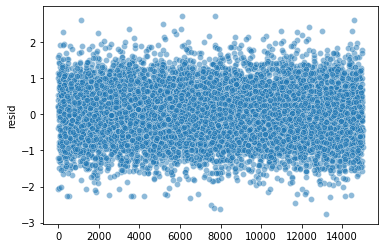

In [194]:
sns.scatterplot(x=train.index ,y='resid',data=train,alpha=.5)

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='resid'>

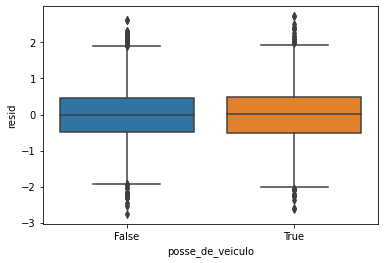

In [195]:
sns.boxplot(x='posse_de_veiculo',y='resid',data=train)

<AxesSubplot:xlabel='tempo_emprego', ylabel='resid'>

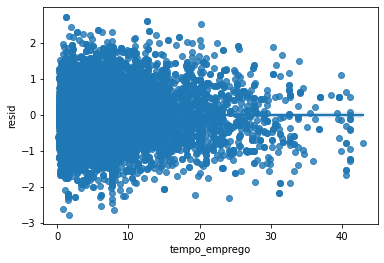

In [196]:
sns.regplot(x='tempo_emprego',y='resid',data=train)